In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [172]:
ds = xr.open_dataset('data/nwp_regrid_197901_202508.nc')

In [173]:
stacked = ds.vorticity.stack(space=('lon', 'lat')).fillna(0)

In [174]:
n_clusters = 4
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage='ward'
)
ward.fit(stacked)

,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [175]:
label = ward.labels_

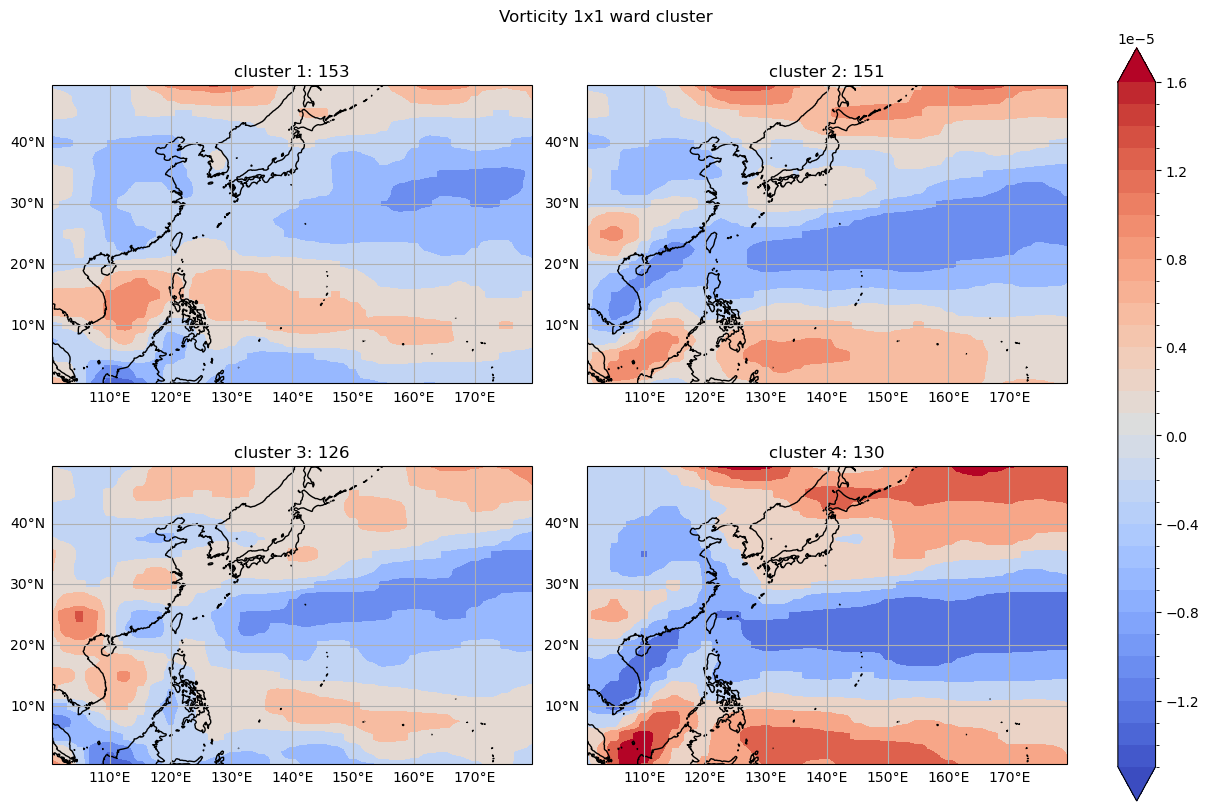

In [176]:
ncols, nrows = (2, 2)
figsize = (12, 8)

fig, axes = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=figsize,
    subplot_kw={'projection': ccrs.PlateCarree()},
    layout='constrained'
)

fig.suptitle('Vorticity 1x1 ward cluster')

cmap = mpl.cm.coolwarm
bounds = np.arange(-1.5e-5, 1.5e-5 + 0.1e-5, 0.1e-5)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

for l, ax in enumerate(axes.flat):
    cs = ax.contourf(
        ds.lon, ds.lat,
        ds.vorticity[label == l, :, :].mean('time'),
        transform=ccrs.PlateCarree(),
        cmap=cmap, norm=norm
    )
    ax.add_feature(cfeature.COASTLINE, zorder=1, edgecolor='k')
    ax.set_title(f'cluster {l+1}: {np.count_nonzero(label==l)}')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels= False

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=axes.ravel().tolist(), location='right')
plt.show()

In [177]:
stacked = ds.ssta.stack(space=('lon', 'lat')).fillna(-999.)
n_clusters = 4
ward = AgglomerativeClustering(
    n_clusters=n_clusters, linkage='ward'
)
ward.fit(stacked)
label = ward.labels_

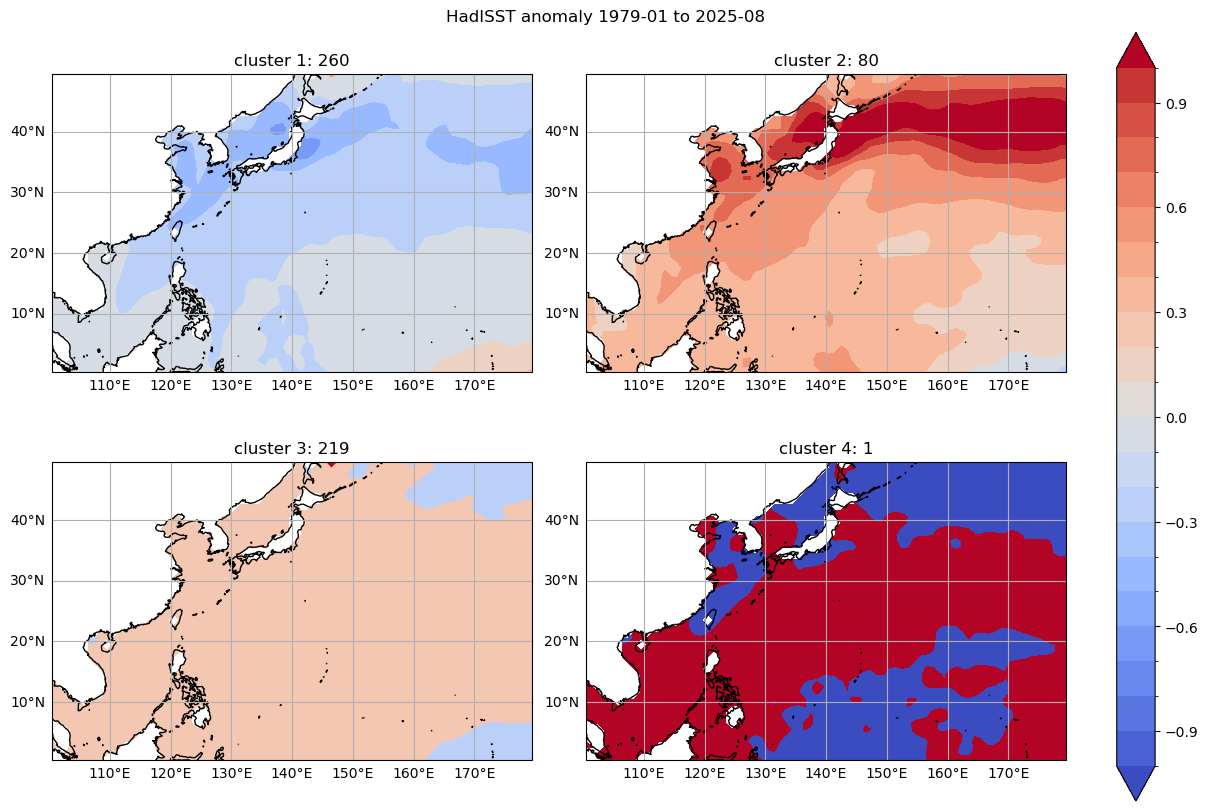

In [178]:
ncols, nrows = (2, 2)
figsize = (12, 8)

fig, axes = plt.subplots(
    ncols=ncols, nrows=nrows, figsize=figsize,
    subplot_kw={'projection': ccrs.PlateCarree()},
    layout='constrained'
)

cmap = mpl.cm.coolwarm
bounds = np.arange(-1.0, 1.0 + 0.1, 0.1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.suptitle('HadISST anomaly 1979-01 to 2025-08')
for l, ax in enumerate(axes.flat):
    cs = ax.contourf(
        ds.lon, ds.lat,
        ds.ssta[label == l].mean('time'),
        transform=ccrs.PlateCarree(),
        cmap=cmap, norm=norm,
    )
    ax.add_feature(cfeature.COASTLINE, zorder=1, edgecolor='k')
    ax.set_title(f'cluster {l+1}: {np.count_nonzero(label==l)}')
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels= False

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=axes.ravel().tolist(), location='right')
plt.show()

In [184]:
stacked

<xarray.DataArray 'ssta' (time: 560, space: 4000)> Size: 9MB
array([[-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         3.4456253e-01,  3.6741829e-01,  4.3637466e-01],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         3.6305428e-01,  4.5084572e-01,  5.8337784e-01],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         6.3641930e-01,  5.2507782e-01,  4.8309517e-01],
       ...,
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         1.0163307e-01,  3.4046173e-02,  6.5708160e-03],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         1.3668251e-01,  5.2101135e-02, -7.4245453e-02],
       [-9.9900000e+02, -9.9900000e+02, -9.9900000e+02, ...,
         1.9851494e-01,  1.3875580e-01,  5.0886154e-02]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-16T12:00:00 ... 2025-08-16T12:...
  * space    (space) object 32kB MultiIndex
    month    (time) int64 4kB ...
    level    float32 4B ...
  * lon      (space) float32 16kB 100.5 100.5 100.5 100.5 ... 179.5 179.5 179.5
  * lat      (space) float32 16kB 49.5 48.5 47.5 46.5 45.5 ... 3.5 2.5 1.5 0.5